In [13]:
#Group Members
# L1F20BSCS0385 Abdul Hanan
# L1F20BSCS0838 M. Huraira Younas
# L1F20BSCS0914 Tahir Mahmood

# importing Libaries
import json
import nltk
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalAvgPool1D, Flatten

In [14]:
# importing dataset
with open('./intents.json') as intents:
    data = json.load(intents)

In [15]:
# genreating all the data to lists
tags = []
inputs = []
responses = {}
for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for line in intent['patterns']:
        inputs.append(line)
        tags.append(intent['tag'])

In [16]:
# converting to dataframe
data = pd.DataFrame({"patterns": inputs, "tag": tags})
data

,patterns,tag
0,Hi,greeting
1,How are you?,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
...,...,...
373,ragging against,ragging
374,antiragging facility,ragging
375,ragging juniors,ragging
376,ragging history,ragging


In [17]:
# Remove punctuation and convert to lowercase
import string
data['patterns'] = data['patterns'].apply(
    lambda wrd: [ltrs.lower()
                 for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

# Display the data
data

,patterns,tag
0,hi,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hello,greeting
4,good day,greeting
...,...,...
373,ragging against,ragging
374,antiragging facility,ragging
375,ragging juniors,ragging
376,ragging history,ragging


In [18]:
# tokenizing the data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])

x_train = pad_sequences(train)

le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [19]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [20]:
# define Vocabulary
vocabulary = len(tokenizer.word_index)
output_length = le.classes_.shape[0]
print('Numbers of Unique Words: ', vocabulary)
print("output lenght: ", output_length)

Numbers of Unique Words:  265
output lenght:  35


In [21]:
# creating model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

In [22]:
# compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam', metrics=['accuracy'])
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0590 - loss: 3.5543
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0562 - loss: 3.5446
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0614 - loss: 3.5293
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0558 - loss: 3.5023
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0618 - loss: 3.4662
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0555 - loss: 3.4468
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0350 - loss: 3.4271   
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1008 - loss: 3.3684
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1260 - loss: 3.3804
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1025 - loss: 3.3586
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0954 - loss: 3.3449
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accura

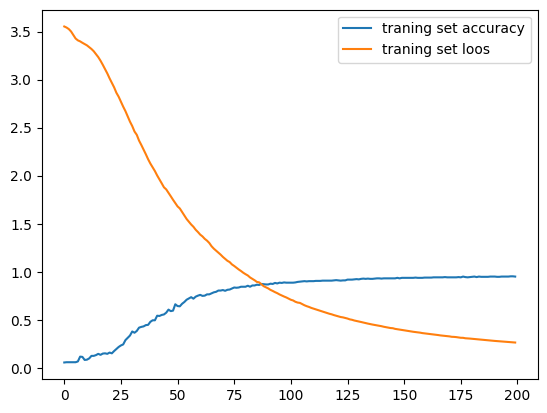

In [23]:
# ploting model accuracy
plt.plot(train.history['accuracy'], label='traning set accuracy')
plt.plot(train.history['loss'], label='traning set loos')
plt.legend()

In [24]:
import random
import string
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

while True:
    text_p = []
    user_input = input('You: ')

    # Removing punctuation and converting to lowercase
    user_input = [letters.lower() for letters in user_input if letters not in string.punctuation]
    user_input = ''.join(user_input)
    text_p.append(user_input)

    # Tokenizing and padding
    user_input = tokenizer.texts_to_sequences(text_p)
    user_input = np.array(user_input).reshape(-1)
    user_input = pad_sequences([user_input], maxlen=input_shape)    

    # Getting output from model
    output = model.predict(user_input)
    output = output.argmax()

    # Finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("UCP AI CHATBOT: ", random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
AI Content Scripter:  UCP AI ChatBot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
AI Content Scripter:  M.Huraria Younas, Abdul Hanan Butt, Tahir Mahmood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
AI Content Scripter:  UCP Held Many Events For event detail visit https://ucp.edu.pk/u_event_cat/up-coming-events/
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
AI Content Scripter:  I am glad I helped you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
AI Content Scripter:  Please Click on the link to find out Our location https://maps.app.goo.gl/w3haCAw1PkcL5FNk9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
AI Content Scripter:  Hostal Avaliable only for girls Visit https://ucp.edu.pk/facilities/girls-hostel/ for more info.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
AI Content Scripter:  Welcome, anything else i can assist you with?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
AI Content Scripter:  I am glad I helped you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
AI Content Scripter:  Goodbye!
